<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Coleta de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Web Crawling;</li>
  <li>Web Scraping;</li>
  <li>Web API.</li>
</ol>

---

# **Exercícios**

## 1\. Filmes populares do IMDB

O [IMDB](https://www.imdb.com/) é um famoso site de `reviews` de filmes e seriados. Uma das páginas mais acessadas do website é o ranking de filmes mais bem votados. Neste exercício, vamos extrair informações deste website:

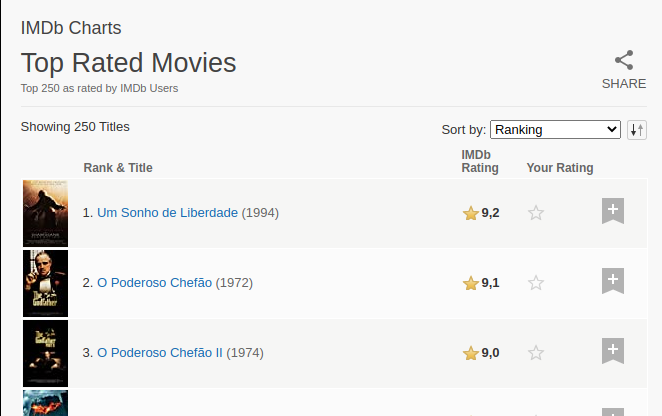

### **1.1. Arquivo Robots.txt** 

Utilize o pacote Python `requests` para fazer o download do conteúdo do arquivo `robots.txt` do site do IMDB e salve numa variável chamada `robots`, este é o link:

```
https://www.imdb.com/robots.txt
```

Com o conteúdo na variável `robots`, verifique se a palavra `top` ou `charts` está presente no conteúdo do texto. Se sim, imprima `True`, senão imprima `False`. 

In [78]:
# função do web crawler
import requests
from requests.exceptions import HTTPError

def crawl_website(url: str) -> str:

    try:
        resposta = requests.get(url)
        resposta.raise_for_status()
    except HTTPError as exc:
        print(exc)
    else:
        return resposta.text

In [79]:
# solução do exercício 1.1
URL = "https://www.imdb.com/robots.txt"

robots = crawl_website(url=URL)

print(robots)

# robots.txt for https://www.imdb.com properties
User-agent: *
Disallow: /OnThisDay
Disallow: /ads/
Disallow: /ap/
Disallow: /mymovies/
Disallow: /r/
Disallow: /register
Disallow: /registration/
Disallow: /search/name-text
Disallow: /search/title-text
Disallow: /find
Disallow: /find$
Disallow: /find/
Disallow: /tvschedule
Disallow: /updates
Disallow: /watch/_ajax/option
Disallow: /_json/video/mon
Disallow: /_json/getAdsForMediaViewer/
Disallow: /list/ls*/_ajax
Disallow: /*/*/rg*/mediaviewer/rm*/tr
Disallow: /*/rg*/mediaviewer/rm*/tr
Disallow: /*/mediaviewer/*/tr
Disallow: /title/tt*/mediaviewer/rm*/tr
Disallow: /name/nm*/mediaviewer/rm*/tr
Disallow: /gallery/rg*/mediaviewer/rm*/tr
Disallow: /tr/
Disallow: /title/tt*/watchoptions
Disallow: /search/title/?title_type=feature,tv_movie,tv_miniseries,documentary,short,video,tv_short&release_date=,2020-12-31&lists=%21ls538187658,%21ls539867036,%21ls538186228&view=simple&sort=num_votes,asc&aft

User-agent: Baiduspider
Disallow: /list/*
Disallo

In [80]:
import re

ocorrencias = re.findall('top', robots, re.IGNORECASE) + re.findall('charts', robots, re.IGNORECASE)
print(len(ocorrencias) > 0)

False


**Dica**: Você pode colar o endereço do arquivo robots.txt no seu navegador para visualizar o conteúdo do arquivo.

### **1.2. Crawling & Scraping** 

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 filmes mais populares do IMDB (titulo, ano e nota), este é o link:

```
https://www.imdb.com/chart/top/
```

Escreva os dados extraídos no arquivo csv `imdb.csv` separado por `;` no seguinte formato:

```
ranking;titulo;ano;nota
1;The Shawshank Redemption;1994;9.2
2;The Godfather;1972;9.1
3;The Godfather: Part II;1974;9.0
```

In [81]:
# a) Utilize o pacote requests para fazer o download da página na variável conteudo

import requests
from requests.exceptions import HTTPError

URL = 'https://www.imdb.com/chart/top/'

conteudo = crawl_website(URL)

In [82]:
# b) Utilize o pacote beautifulsoup4 para carregar o HTML da variavel conteudo na variavel pagina

from bs4 import BeautifulSoup

pagina = BeautifulSoup(conteudo, 'html.parser')

In [85]:
# c) Utilize o código abaixo para iterar nas linhas e colunas da tabela e preencher a variavel conteudo_extraido

dados_extraidos = []

tabela = pagina.find('table', class_='chart')

for linha in tabela.find_all('tr'):
    textos_coluna = list()
    
    for coluna in linha.find_all('td'):
        texto_coluna = coluna.get_text().strip().split('\n')
        textos_coluna += texto_coluna

    if len(textos_coluna) > 0:
        dados_extraidos.append(textos_coluna)
    
dados_extraidos = dados_extraidos[:10]

conteudo_extraido = {
    "Top10": dados_extraidos,  
}

print(conteudo_extraido)

{'Top10': [['', '1.', '      刺激1995', '(1994)', '9.2', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '2.', '      教父', '(1972)', '9.2', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '3.', '      黑暗騎士', '(2008)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '4.', '      教父第二集', '(1974)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '5.', '      十二怒漢', '(1957)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '6.', '      辛德勒的名單', '(1993)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '7.', '      魔戒三部曲：王者再臨', '(2003)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '8.', '      黑色追緝令', '(1994)', '8.8', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', ''], ['', '9.', '      魔戒首部曲：魔戒現身', '(2001)', '8.8', '12345678910 ', '', '', '', 'NOT YE

**Dica**: O código na letra c já extrai o conteúdo das linhas na lista `textos_coluna`, basta que você extraia o conteúdo de interesse dela. Como exemplo:

```python
[]
['', '1.', '      The Shawshank Redemption', '(1994)', '9.2', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '2.', '      The Godfather', '(1972)', '9.1', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '3.', '      The Godfather: Part II', '(1974)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '4.', '      The Dark Knight', '(2008)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '5.', '      12 Angry Men', '(1957)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
```

In [59]:
# d) Escreva o arquivo imdb.csv com o conteudo da variavel conteudo_extraido

import pandas as pd

data = pd.DataFrame(conteudo_extraido)
data.to_csv("imdb.csv", sep=";", index=False)

---